# Iris Data Analysis
### Data processing procedure
* Importing the libraries
* Importing the dataset/csv file
* Data cleaning
* Data Analysing
* Data visualization using matplotlib and seaborns

In [10]:
# Importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

### Import Dataset

In [11]:
# Lets now see the null values in our dataset
# From the look of the dataset we can see that there are no null values
df=pd.read_csv("iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# Lets now check the first five and last five rows
print(df.head())
print(df.tail())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
     sepal.length  sepal.width  petal.length  petal.width    variety
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica


In [13]:
# Check minimum and maximum values
# From our dataset we can see that the maximum sepal.legth for an iris is 7.9 
# While the minimum sepal length is 4.3
print(df.max())
print(df.min())

sepal.length          7.9
sepal.width           4.4
petal.length          6.9
petal.width           2.5
variety         Virginica
dtype: object
sepal.length       4.3
sepal.width        2.0
petal.length       1.0
petal.width        0.1
variety         Setosa
dtype: object


## Exploratory Data Analysis (EDA)

* Perform summary statistics, such as mean, median, and standard deviation.
* Visualize data distributions using histograms and box plots. 

In [14]:
# Now that we do not have null values we can perfom our data summary statistics
# Rather than going through each column in the dataframe to see the unique values,
# We can return a count value for each column in the DataFrame using the funtion below
df.nunique()

sepal.length    35
sepal.width     23
petal.length    43
petal.width     22
variety          3
dtype: int64

In [15]:
 # Lets now perfom some statistics using groupby() function
df.groupby(by=['sepal.length','petal.width']).count()

sepal.width  petal.length  variety
sepal.length petal.width                                    
4.3          0.1                    1             1        1
4.4          0.2                    3             3        3
4.5          0.3                    1             1        1
4.6          0.2                    3             3        3
             0.3                    1             1        1
...                               ...           ...      ...
7.6          2.1                    1             1        1
7.7          2.0                    1             1        1
             2.2                    1             1        1
             2.3                    2             2        2
7.9          2.0                    1             1        1

[110 rows x 3 columns]

In [16]:
print(df.groupby(by=['sepal.length','petal.width']).count().min())
print(df.groupby(by=['sepal.length','petal.width']).count().max())

sepal.width     1
petal.length    1
variety         1
dtype: int64
sepal.width     5
petal.length    5
variety         5
dtype: int64


In [25]:
# Load the Iris dataset
iris = load_iris()
df1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df1['species'] = iris.target_names[iris.target]
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


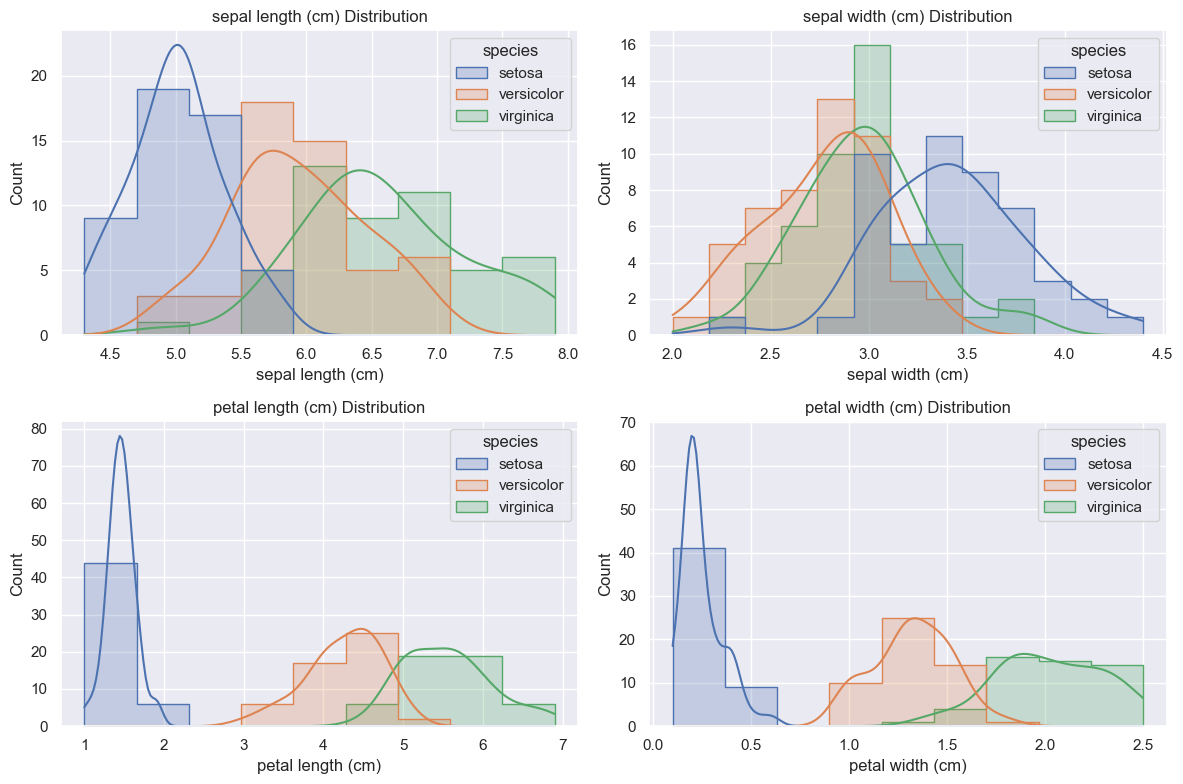

In [27]:
# Set the style of seaborn
sns.set(style="darkgrid")
# Visualize feature distributions using histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df1, x=feature, kde=True, hue='species', element="step", common_norm=False)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

### Exploring the distribution of the Iris dataset in Python involves using various statistical and visualization techniques.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


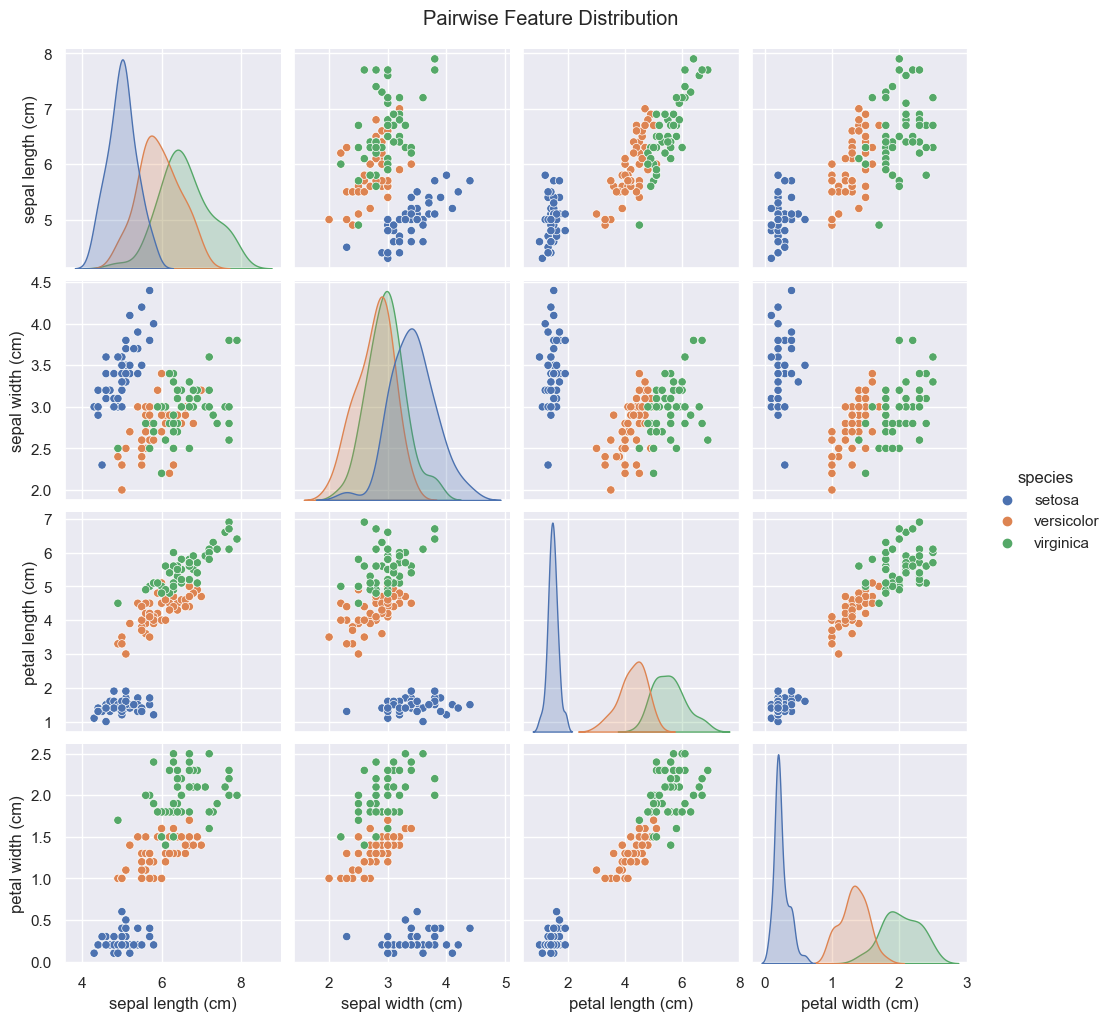

In [28]:
# Pairplot for pairwise feature distribution
df1['species'] = iris.target_names[iris.target]
sns.pairplot(iris_df, hue="species", height=2.5)
plt.suptitle("Pairwise Feature Distribution", y=1.02)
plt.show()


## Class Separation
### Violin plots for individual feature distribution

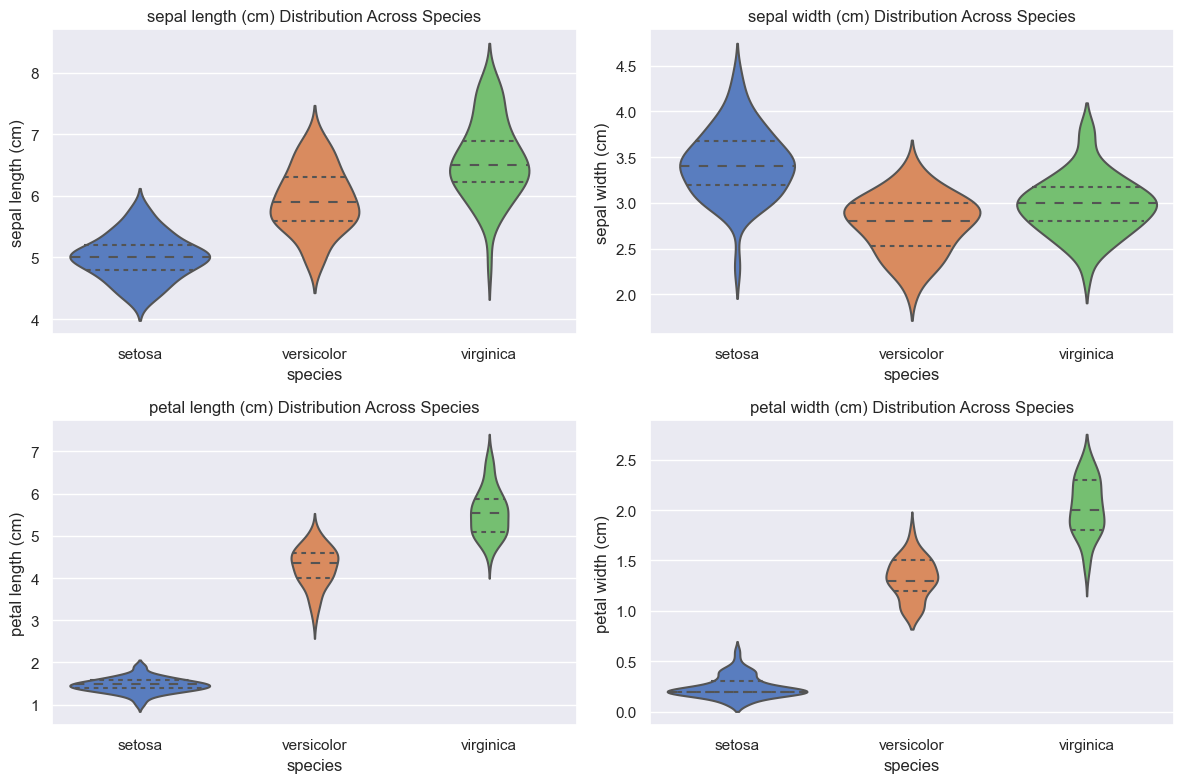

In [30]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=feature, data=df1, inner="quartile", palette="muted")
    plt.title(f'{feature} Distribution Across Species')
plt.tight_layout()
plt.show()

### Implement machine learning models like Decision Trees and Support Vector Machines (SVM) for classification
### On the Iris dataset and evaluate their performance using metrics like accuracy, precision, and recall.

In [45]:
# Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# Split the data into features (X) and target labels (y)
X = df1.drop('species', axis=1)
y = df1['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Display classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    return accuracy, precision, recall

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_accuracy, dt_precision, dt_recall = train_and_evaluate_classifier(dt_classifier, X_train, y_train, X_test, y_test)
print(f"Decision Tree Classifier - Accuracy: {dt_accuracy:.4f}, Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}")


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Decision Tree Classifier - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000


In [40]:
# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(random_state=42)
svm_accuracy, svm_precision, svm_recall = train_and_evaluate_classifier(svm_classifier, X_train, y_train, X_test, y_test)
print(f"SVM Classifier - Accuracy: {svm_accuracy:.4f}, Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}")

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVM Classifier - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000


In [46]:
# From the above results we can conclude the following 
# Precision measures the accuracy of positive predictions. 
# A precision of 1.0 means that every positive prediction made by the model for that class is correct. There are no false positives.
# Recall measures the ability of the model to capture all instances of the positive class. 
# A recall of 1.0 means that the model has successfully identified and captured every positive instance without missing any (no false negatives).
# The F1-score is the harmonic mean of precision and recall. 
# A perfect F1-score of 1.0 indicates a balance between precision and recall, achieving both high accuracy and completeness.
# A precision, recall, and F1-score of 1.0 collectively suggest that there are no misclassifications for that class. 
# Every prediction made by the model for that class is correct, and there are no instances of false positives or false negatives.
# these perfect scores are consistent across all classes, it suggests high overall model accuracy. 
# The model is performing exceptionally well on the given dataset

# Findings & Insights from the Iris dataset

### Sepal Length:

* Setosa tends to have a smaller sepal length compared to Versicolor and Virginica.
* Versicolor and Virginica have a wider range of sepal lengths, with Virginica generally having longer sepals than Versicolor.

### Sepal Width:

* Setosa typically has a higher sepal width compared to Versicolor and Virginica.
* Virginica shows a wider spread in sepal width compared to Setosa and Versicolor.

### Petal Length:

* Setosa has the smallest petal length, while Virginica tends to have the largest.
* Versicolor falls in between, with a moderate range of petal lengths.

### Petal Width:

* Setosa has the smallest petal width, while Virginica tends to have the largest.
* Versicolor falls in between, similar to the petal length distribution.

### Overall:

* Petal measurements (length and width) appear to be more distinctive in differentiating species compared to sepal measurements.
* Setosa is generally distinguishable from the other two species in all features, especially in petal characteristics.
* Versicolor and Virginica show some overlap in sepal measurements but are more distinct in petal measurements.

# Conclusion

### In conclusion, the analysis of the iris dataset reveals distinct patterns in sepal and petal measurements among the three iris species: Setosa, Versicolor, and Virginica. Setosa is characterized by smaller sepal and petal dimensions, particularly in petal length and width. Versicolor and Virginica exhibit some overlap in sepal measurements, but they are more clearly differentiated by petal characteristics. Petal length and width prove to be crucial factors in distinguishing between Versicolor and Virginica. Overall, these findings underscore the value of sepal and petal features in classifying iris species and highlight the unique morphological characteristics of each species.